Our client is a banking firm located in Europe. They have just completed their latest marketing campaign and they found that reaching out to every customer in their database is both costly and wasteful. We have advised that they create a customer avatar for each product and target their ideal customer in their campaigns instead. The data provided to us to complete this task was the resulting data from their latest marketing campaign. My task specifically, is to conduct a series of hypothesis tests to confirm or dismiss certain assumptions that the company has about their ideal client.

Let's get started.

We will start by importing the necessary packages and having a look at the data that has been provided.

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats import power
from statsmodels.stats.power import TTestIndPower



In [2]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
pd.set_option('display.max_columns', None)


With the data loaded in, first I will have a look to make sure there are no missing valiues and that the data is clean.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [4]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


After looking at the features available in the dataset, I've decided that the best way to build the client's new customer avatar is to focus on the following categories.

1. Demographics 

2. Behavior - 

3. Timing -  


Demographic info is available in the columns age, job, marital status, and education features.
Timing data is available in the cloumns month of last contact, day of last contact, duration of the call, number of times contacted, days since contacted in last campaign. Behavior data is available in the columns housing(does customer have a home loan), loan (personal loan), poutcome (previous campaign outcome).


Given limited time, I chose to perform my hypothesis testing using the education, seasonality, and previous campaign outcome features. Education and previous campaign outcome are already provided, but I will have to create a column for seasonality to account for wearm and cold weather.

First, want to know if previous outcomes have an effect on current outcomes. I'm looking to see a percentage of yes and and no values grouped by previous outcomes.

# Previous Campaign Outcome Testing

In [7]:
df.groupby(['poutcome', 'y']).count()

age    job  marital  education  default  housing   loan  \
poutcome    y                                                                
failure     no    3647   3647     3647       3647     3647     3647   3647   
            yes    605    605      605        605      605      605    605   
nonexistent no   32422  32422    32422      32422    32422    32422  32422   
            yes   3141   3141     3141       3141     3141     3141   3141   
success     no     479    479      479        479      479      479    479   
            yes    894    894      894        894      894      894    894   

                 contact  month  day_of_week  duration  campaign  pdays  \
poutcome    y                                                             
failure     no      3647   3647         3647      3647      3647   3647   
            yes      605    605          605       605       605    605   
nonexistent no     32422  32422        32422     32422     32422  32422   
            yes     3141   3141         3141      3141      3141   3141   
success     no       479    479          479       479       479    479   
            yes      894    894          894       894       894    894   

                 previous  emp.var.rate  cons.price.idx  cons.conf.idx  \
poutcome    y                                                            
failure     no       3647          3647            3647           3647   
            yes       605           605             605            605   
nonexistent no      32422         32422           32422          32422   
            yes      3141          3141            3141           3141   
success     no        479           479             479            479   
            yes       894           894             894            894   

                 euribor3m  nr.employed  
poutcome    y                            
failure     no        3647         3647  
            yes        605          605  
nonexistent no       32422        32422  
            yes       3141         3141  
success     no         479          479  
            yes        894          894

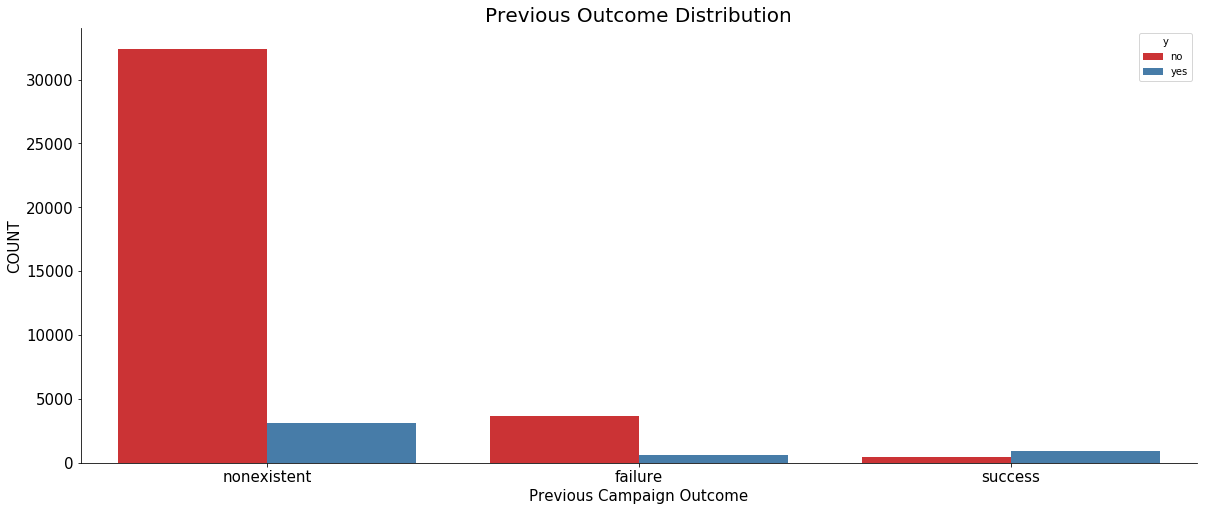

In [99]:
#OUT COME COUNT BASED ON EDUCATION
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'poutcome', hue='y', data = df, palette='Set1')
ax.set_xticklabels(df['poutcome'].unique())
ax.set_xlabel('Previous Campaign Outcome', fontsize=15)
ax.set_ylabel('COUNT', fontsize=15)
ax.set_title('Previous Outcome Distribution', fontsize=20)
ax.tick_params(labelsize=15)
sns.despine()

This output gives a count of the number of people in each category. Even though it's not the output that I wanted, it still gives me an idea opf what I'm looking at. Would still love to see these in percentages. Since I'm looking to see the effect that the previous campaign outcome had on the outcome of most recent campaign, I can use the values in each category to visualize what that effect looks like.

In [100]:
x = df.poutcome.value_counts()
j = df.groupby(['poutcome', 'y']).size()
print(x)
print(j)

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64
poutcome     y  
failure      no      3647
             yes      605
nonexistent  no     32422
             yes     3141
success      no       479
             yes      894
dtype: int64


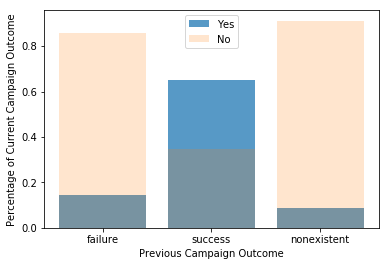

In [101]:
prev_outcome = ['failure', 'success', 'nonexistent']
yes = [605/4252, 894/1373, 3141/35563]
no = [3647/4252, 479/1373, 32422/35563]

plt.xlabel('Previous Campaign Outcome')
plt.ylabel('Percentage of Current Campaign Outcome')
plt.bar(prev_outcome, yes, alpha = .75, label ='Yes')
plt.bar(prev_outcome, no, alpha = .2, label = 'No')
plt.legend()

Wow, that was unexpected. People who were marketed to successfully during the previous campaign seemed to have said yes to the most recent campaign much more often than everyone else. Lets dig deeper into that with some hypothesis testing.

$H_0: P_1 = P_2$

$H_A: P_1  ≠ P_2$

**Null hypothesis** the proportion of customers that had a successful previous campaign and said yes to this campaign is equal to the proportion of customers who did not have a successfull campaign and said yes to this campaign. 

**Alternate Hypothesis:** The proportions are not equal.

Let's test it with a two proportion z test!


In [27]:
success_total = df.loc[df['poutcome']=='success'] #total number of customers with successful outcomes from the previous campaign
failure_total = df.loc[df['poutcome']=='failure'] #total number of customers with failed outcomes in the previous campaign
non_total = df.loc[df['poutcome']=='nonexistent'] # total number of customers with non existen outcomes in the previous campaign
success_y = success_total.loc[success_total['y']=='yes']# number of sign ups in this campaign from people that had a successful outcome in the last campaign
failure_y = failure_total.loc[failure_total['y'] == 'yes'] #number of sign ups in this campaign from people that had a failed outcome in the last campaign
nonex_y = non_total.loc[non_total['y'] == 'yes'] #number of sign ups in this campaign from people that had a non existen outcome in the last campaign
non_success = len(failure_y) + len(nonex_y)
non_success_total = len(failure_total) + len(non_total)

# count = np.array([len(success_y), (len(failure_y) + len(non_y))])
count = np.array([len(success_y), non_success])
nobs = np.array([len(success_total), non_success_total])
z,p = proportions_ztest(count, nobs, value=0, alternative='two-sided')
print(' z-stat = {z} \n p-value = {p}'.format(z=z,p=p))

 z-stat = 64.18632406956367 
 p-value = 0.0


That p-value is really small which causes me to be suspicious.

In [11]:
non_success_total/len(df)

0.9666650480722541

So 96% of the data was caterized as being non successfull on the previous campaign. Perhaps I should rethink my test. The non-existent category is very mysterious. We dont know if these are new customers, if they just didn't have the data for them, or if there was some other kind of circumstance here. 

In [12]:
#let's see how much of the data is categorized as non existent, failure and success.
print('Poutcome Non Existent Percentage of Data: {}'.format(len(non_total)/len(df))) 
print('Poutcome Failure Percentage of Data: {}'.format(len(failure_total)/len(df)))
print('Poutcome Success Percentage of Data: {}'.format(len(success_total)/len(df)))

Poutcome Non Existent Percentage of Data: 0.8634310964358551
Poutcome Failure Percentage of Data: 0.10323395163639895
Poutcome Success Percentage of Data: 0.033334951927745944


As I suspected a large part of the data is categorized as being nonexistent in the poutcome feature. This is definitely affected our results. Instead, I'll adjust my hypothesis and perform a new test. 

Previously my P1 value represented previous campaign success and my P2 value was previous campaign non_successes, including failure and non_existent outcomes. This time I will adjust my P2 value to represent failed outcomes only. Looking back, this approach makes sense so we can make a better comparison.

In [28]:
count = np.array([len(success_y), len(failure_y)])
nobs = np.array([len(success_total), len(failure_total)])
z,p = proportions_ztest(count, nobs, value=0, alternative='two-sided')
print(' z-stat = {z} \n p-value = {p}'.format(z=z,p=p))

 z-stat = 37.07758830060586 
 p-value = 6.454681991329467e-301


We still have a really small p value, but at least this time it isn't zero, which makes me feel better about the results. 

With the results of, we can effectively reject the null hypothesis. The difference between custoemrs that said yes to a previous campaign and this campaign compared to customers who said no to a previous campaign and said yes to this campaign is statistically significant. Our working assumption is that that the difference between a customer's receptiveness to the previous campaign is greater than those who have failed and even more so than those who had non existent previous campaign outcomes. Let's look at how meaningful that is in the context of the data provided by performing a measurement  of effect size.






In [23]:
p2

0.1422859830667921

In [25]:
p1 = len(success_y)/len(success_total)# proportion of successes from previous campaign that signed up
p2 = len(failure_y)/len(failure_total)# proportion of failures from previous campaign that signed up
theta1 = 2 * (np.arcsin(np.sqrt(p1)))
theta2 = 2 * (np.arcsin(np.sqrt(p2)))
cohensh = theta1 - theta2
cohensh

1.104296927342266

That effect size is pretty big. With such a large effect size, we can conclude that the effect of a lead being a customer from previous campaign made a big difference in their likelihood of them saying yes to the current campaign offer.

Just to be thorough in jour test, lets look at the risk of us being wrong with a power analysis.

In [61]:

statsmodels.stats.power.zt_ind_solve_power(effect_size = cohensh, nobs1 = len(success_y), alpha = .05, power = None, ratio = len(failure_y)/len(success_y))




1.0

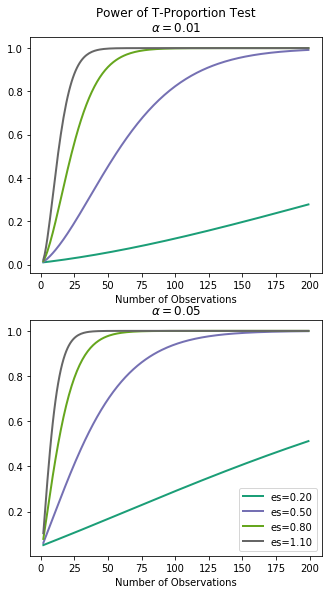

In [60]:
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs=np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8, 1.1]),
                                 alpha=0.01,
                                 ax=ax, title='Power of T-Proportion Test' + '\n' + r'$\alpha = 0.01$')
plt.subplots_adjust(bottom=0.2, right=0.8, top=2.0)
ax.get_legend().remove()
ax = fig.add_subplot(2, 1, 2)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs=np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8, 1.1]),
                                 alpha=0.05,
                                 ax=ax, title=r'$\alpha = 0.05$')

According to our analysis, since we have such a large number of observations and a large effect size, there is very little risk of us being wrong in rejecting the Null hypothesis that the two proportions are equal. The difference between these two proportions is rather large and easy to detect.

**Conclusion**

The intuition that customers who have purchased in the past are more likely to purchase in the future is nothing ground-breaking. However, using an effect size measurement, we can quantify this phenomenon and compare it to others. This way, the client may be able to rethink their sales strategy to a more long term approach. Perhaps it will be worth it to them to offer additional discounts and incentives to first time purchasers. Again, nothing ground-breaking here but with further testing, we can drill down exactly who those perfect customers are and what type of incentives will move the needle most with them. We can find customers that took less touches to sign up, what their demographics are and what other behaviors they participate in to create a really targetted consumer avatar. We could then build out several of those personas knowing in advance how much each is worth and help the client prioritize their resources to reach out to those indiviuduals accoordingly. Down the road, we can use more advanced modeling techniches to advise our client when to reach out to customers at times that we know they are ready and willing to sign up. 

However, those are questions, tests, and models for another day. For now, let's stick with the original road map and move on to testing based on education. What effect does education have on signups? Are more educated leads more likely to purchase the client's product as a result of this most recent marketing campaign? Let's do some testing to find out.

# Education Demographic Testing

In [14]:
df.groupby(['education','y']).count()

age    job  marital  default  housing   loan  \
education           y                                                     
basic.4y            no    3748   3748     3748     3748     3748   3748   
                    yes    428    428      428      428      428    428   
basic.6y            no    2104   2104     2104     2104     2104   2104   
                    yes    188    188      188      188      188    188   
basic.9y            no    5572   5572     5572     5572     5572   5572   
                    yes    473    473      473      473      473    473   
high.school         no    8484   8484     8484     8484     8484   8484   
                    yes   1031   1031     1031     1031     1031   1031   
illiterate          no      14     14       14       14       14     14   
                    yes      4      4        4        4        4      4   
professional.course no    4648   4648     4648     4648     4648   4648   
                    yes    595    595      595      595      595    595   
university.degree   no   10498  10498    10498    10498    10498  10498   
                    yes   1670   1670     1670     1670     1670   1670   
unknown             no    1480   1480     1480     1480     1480   1480   
                    yes    251    251      251      251      251    251   

                         contact  month  day_of_week  duration  campaign  \
education           y                                                      
basic.4y            no      3748   3748         3748      3748      3748   
                    yes      428    428          428       428       428   
basic.6y            no      2104   2104         2104      2104      2104   
                    yes      188    188          188       188       188   
basic.9y            no      5572   5572         5572      5572      5572   
                    yes      473    473          473       473       473   
high.school         no      8484   8484         8484      8484      8484   
                    yes     1031   1031         1031      1031      1031   
illiterate          no        14     14           14        14        14   
                    yes        4      4            4         4         4   
professional.course no      4648   4648         4648      4648      4648   
                    yes      595    595          595       595       595   
university.degree   no     10498  10498        10498     10498     10498   
                    yes     1670   1670         1670      1670      1670   
unknown             no      1480   1480         1480      1480      1480   
                    yes      251    251          251       251       251   

                         pdays  previous  poutcome  emp.var.rate  \
education           y                                              
basic.4y            no    3748      3748      3748          3748   
                    yes    428       428       428           428   
basic.6y            no    2104      2104      2104          2104   
                    yes    188       188       188           188   
basic.9y            no    5572      5572      5572          5572   
                    yes    473       473       473           473   
high.school         no    8484      8484      8484          8484   
                    yes   1031      1031      1031          1031   
illiterate          no      14        14        14            14   
                    yes      4         4         4             4   
professional.course no    4648      4648      4648          4648   
                    yes    595       595       595           595   
university.degree   no   10498     10498     10498         10498   
                    yes   1670      1670      1670          1670   
unknown             no    1480      1480      1480          1480   
                    yes    251       251       251           251   

                         cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
e

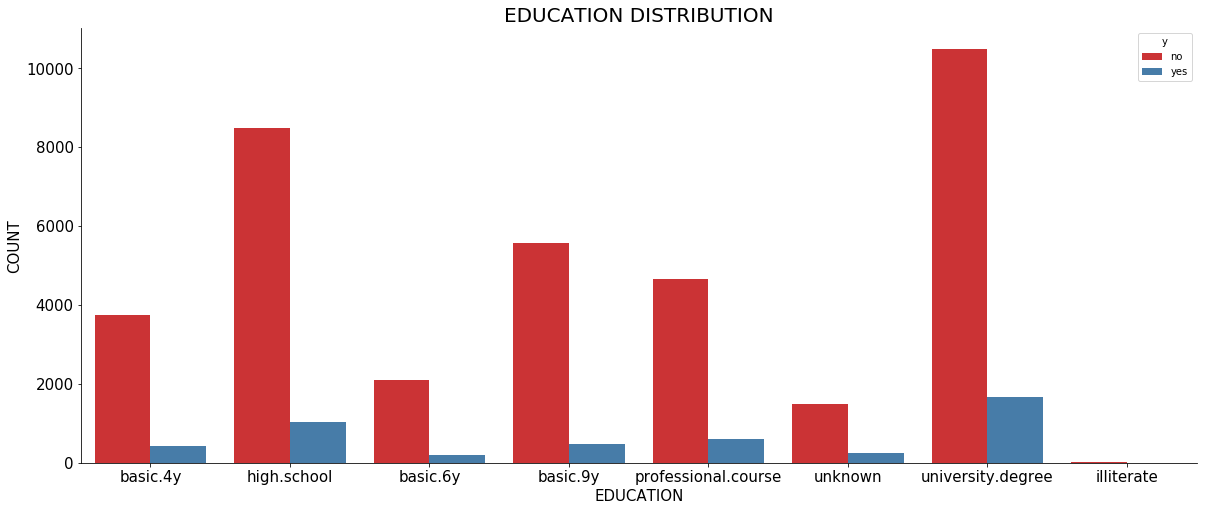

In [110]:
#OUT COME COUNT BASED ON EDUCATION
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'education', hue='y', data = df, palette='Set1')
ax.set_xticklabels(df['education'].unique())
ax.set_xlabel('EDUCATION', fontsize=15)
ax.set_ylabel('COUNT', fontsize=15)
ax.set_title('EDUCATION DISTRIBUTION', fontsize=20)
ax.tick_params(labelsize=15)
sns.despine()

At first glance it looks like high school and college educated prospects are the two largest groups. This falls in line with what I assumed. Let's have a look at the percentages of that data.

In [64]:
#Splitting the data into the appropriate proportions

high_school_total = df.loc[df['education']=='high.school'] #total number of customers with highschool education
college_total = df.loc[df['education']=='university.degree'] #total number of customers with college level education
high_school_y = high_school_total.loc[high_school_total['y']=='yes']# number of sign ups for people with highschool education
college_y = college_total.loc[college_total['y'] == 'yes'] #number of sign ups for people with college education



#let's see how much of the data is categorized as high school and college.


print('College Educated Percentage of Data: {}'.format(len(high_school_total)/len(df))) 
print('High School Educated Percentage of Data: {}'.format(len(college_total)/len(df)))


College Educated Percentage of Data: 0.23101388754006022
High School Educated Percentage of Data: 0.29542585218995826


Since these two proportions represent a little over 50% of the data, most people will fall into one of these two categories. I'll conduct my hypothesis testing on the proportion of signups among high school educated prospects versus college educated prospects.

$H_0: P_1 = P_2$

$H_A: P_1  ≠ P_2$

**Null Hypothesis:**

This marketing campaign was equally successful with both college educated and highschool educated prospects.


In measuring the success of this campaign, the proportion of success for customers with a high school education and a college education are equal.

**Alternate Hypothesis:** 

This campaign was more successful for one group over another.




Again, to test this Hypothesis I'll go with a two sample Z-Test.

In [63]:
# # using statsmodels
# count{int, array_like}
# the number of successes in nobs trials. If this is array_like, 
# then the assumption is that this represents the number of successes for 
# each independent sample
# nobs{int, array_like}
# the number of trials or observations, with the same length as count.

high_school_total = df.loc[df['education']=='high.school'] #total number of customers with highschool education
college_total = df.loc[df['education']=='university.degree'] #total number of customers with college level education
high_school_y = high_school_total.loc[high_school_total['y']=='yes']# number of sign ups for people with highschool education
college_y = college_total.loc[college_total['y'] == 'yes'] #number of sign ups for people with college education



count = np.array([len(college_y), len(high_school_y)])
nobs = np.array([len(college_total), len(high_school_total)])
z,p = proportions_ztest(count, nobs, value=0, alternative='two-sided')
print(' z-stat = {z} \n p-value = {p}'.format(z=z,p=p))

 z-stat = 6.392754392508445 
 p-value = 1.629238494638004e-10


With This P value, we can reject the null hypothesis that the proportions are equal. However, let's look at the effect size of this measurement as well.

**Measuring Effect Size**

h =  theta1 −  theta2

theta =   2 arcsine(SQRT(P))

In [70]:
p1 = len(high_school_y)/len(high_school_total)
p2 = len(college_y)/len(college_total)
theta1 = np.arcsin(np.sqrt(p1))
theta2 = np.arcsin(np.sqrt(p2))
cohensh2 = theta1 - theta2
cohensh2

-0.04408270568413658

That is a really small effect size. The means that although the difference in education is statistically significant, that difference is not very meaningful. Let's take it a bit further and conduct a power analysis.

**Measuring Power**

In [74]:

statsmodels.stats.power.zt_ind_solve_power(effect_size = cohensh2, nobs1 = len(high_school_y), alpha = .05, power = None, ratio = len(college_y)/len(high_school_y))



0.19956615804032818

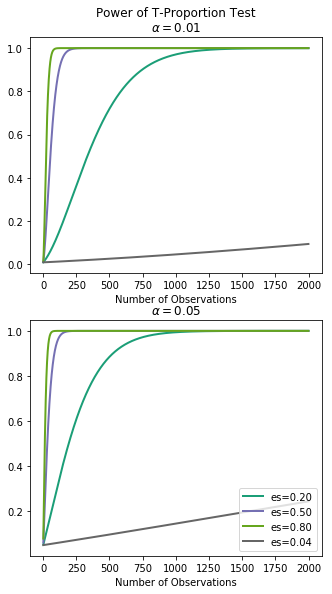

In [80]:
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs=np.arange(2, 2000),
                                 effect_size=np.array([0.2, 0.5, 0.8, .04]),
                                 alpha=0.01,
                                 ax=ax, title='Power of T-Proportion Test' + '\n' + r'$\alpha = 0.01$')
plt.subplots_adjust(bottom=0.2, right=0.8, top=2.0)
ax.get_legend().remove()
ax = fig.add_subplot(2, 1, 2)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs=np.arange(2, 2000),
                                 effect_size=np.array([0.2, 0.5, 0.8, .04]),
                                 alpha=0.05,
                                 ax=ax, title=r'$\alpha = 0.05$')

**Conclusion**

The fact that the power for this experiment is very low is not surprising. This is because power measures the ability to detect a difference when one exists. We've already concluded that there is not a meaningful difference between the two proportions so the ability to detect any differences is understandably small. We can conclude that we should not seperate our customer avatar based on whether they have a college versus high school education. 

# Housing & Loan Testing

**Housing:**

$H_0: P_1 = P_2$

$H_A: P_1  ≠ P_2$

**Null Hypothesis:**

This marketing campaign was equally successful with prospects that had a housing loan as those that did not.


**Alternate Hypothesis:** 

This campaign was more successful for one group over another.

In [103]:
client_Yhousing = df.loc[df['housing']   == 'yes']
client_Nhousing = df.loc[df['housing']   ==  'no']
Yhousing_Y      = client_Yhousing.loc[client_Yhousing['y'] == 'yes']
Nhousing_Y      = client_Nhousing.loc[client_Nhousing['y'] == 'yes']

count = np.array([len(Yhousing_Y), len(Nhousing_Y)])
nobs  = np.array([len(client_Yhousing), len(client_Nhousing)])
stat, pval   = proportions_ztest(count, nobs, value=0, alternative='two-sided')
print(' z-stat = {z} \n p-value = {p}'.format(z=z,p=p))

 z-stat = 6.392754392508445 
 p-value = 1.629238494638004e-10


**Effect Size Calculation**

In [104]:

p1 = len(Yhousing_Y)/len(client_Yhousing)
p2 = len(Nhousing_Y)/len(client_Nhousing)
theta1 = 2 * (np.arcsin(np.sqrt(p1)))
theta2 = 2 * (np.arcsin(np.sqrt(p2)))
cohensh_H = theta1 - theta2
cohensh_H

0.023415826653056193

**Power Analysis**

In [106]:
statsmodels.stats.power.zt_ind_solve_power(effect_size = cohensh_H, nobs1 = len(Yhousing_Y), alpha = .05, power = None, ratio = len(Nhousing_Y)/len(Yhousing_Y))



0.12280447737941334

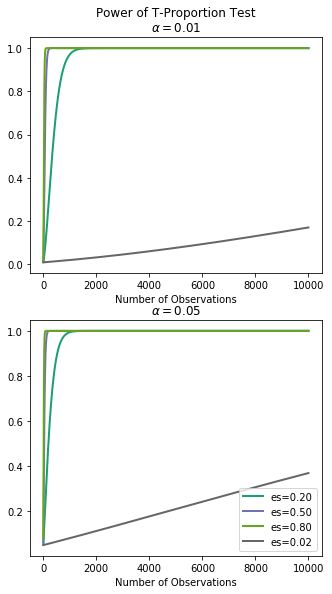

In [107]:
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                  nobs=np.arange(2, 10000),
                                  effect_size=np.array([0.2, 0.5, 0.8, .023]),
                                  alpha=0.01,
                                  ax=ax, title='Power of T-Proportion Test' + '\n' + r'$\alpha = 0.01$')
plt.subplots_adjust(bottom=0.2, right=0.8, top=2.0)
ax.get_legend().remove()
ax = fig.add_subplot(2, 1, 2)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs=np.arange(2, 10000),
                                 effect_size=np.array([0.2, 0.5, 0.8, .023]),
                                 alpha=0.05,
                                 ax=ax, title=r'$\alpha = 0.05$')

**Housing:**

$H_0: P_1 = P_2$

$H_A: P_1  ≠ P_2$

**Null Hypothesis:**

This marketing campaign was equally successful with prospects that had a personal loan as those that did not.


**Alternate Hypothesis:** 

This campaign was more successful for one group over another.

In [109]:
client_Yloan = df.loc[df['loan']   == 'yes']
client_Nloan = df.loc[df['loan']   ==  'no']
Yloan_Y      = client_Yloan.loc[client_Yloan['y'] == 'yes']
Nloan_Y      = client_Nloan.loc[client_Nloan['y'] == 'yes']

count = np.array([len(Yloan_Y), len(Nloan_Y)])
nobs  = np.array([len(client_Yloan), len(client_Nloan)])
z,p   = proportions_ztest(count, nobs, value=0, alternative='two-sided')
print(' z-stat = {z} \n p-value = {p}'.format(z=z,p=p))

 z-stat = -0.9386245311739011 
 p-value = 0.347923553300198


**Conclusion:**

We fail to reject the null hypothesis and conclude that the difference in the proportion of these two subsets of are data are not statistically significant.